In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
info_df = pd.read_csv("../../data/data_info.csv")
strong_imbalance = info_df.loc[info_df["imbalance"] <= 0.21, "name"]
weak_imbalance = info_df.loc[info_df["imbalance"] > 0.21, "name"]

In [3]:
results = get_all_results('experiment2')
results = results.loc[results['dataset_name'] != 'musk']

In [4]:
# results = results.sort_values('test.f1_score', ascending=False)
# results['rank'] = results.groupby('dataset_name')['test.f1_score'].rank(ascending=False)

In [5]:
settings = results[['config_id', 'name', 'config.p_inflate']].fillna('').drop_duplicates().sort_values('config_id')
settings['config_settings'] = settings['name'] + '_' + settings['config.p_inflate'].astype(str)
settings = settings[['config_id', 'config_settings']]
settings
results = results.merge(settings, on='config_id')
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.521739,0.445714,0.629032,0.711111,0.727854,0.488189,0.424658,0.574074,blood,SLIM+ABS_0.25
1,1,2,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.477541,0.337793,0.814516,0.644444,0.699047,0.540230,0.391667,0.870370,blood,SLIM+ABS_0.25
2,1,3,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.526316,0.427136,0.685484,0.680000,0.635261,0.454545,0.384615,0.555556,blood,SLIM+ABS_0.25
3,1,4,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.553459,0.453608,0.709677,0.626667,0.653996,0.408451,0.329545,0.537037,blood,SLIM+ABS_0.25
4,1,5,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.514793,0.406542,0.701613,0.626667,0.640243,0.468354,0.355769,0.685185,blood,SLIM+ABS_0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,20,6,GP,False,50,200,True,1,6,rhh,...,0.339286,0.204301,1.000000,0.209877,0.500000,0.346939,0.209877,1.000000,spect,GP_
3396,20,7,GP,False,50,200,True,1,6,rhh,...,0.152284,0.094340,0.394737,0.209877,0.405331,0.238095,0.149254,0.588235,spect,GP_
3397,20,8,GP,False,50,200,True,1,6,rhh,...,0.121547,0.076923,0.289474,0.234568,0.272978,0.184211,0.118644,0.411765,spect,GP_
3398,20,9,GP,False,50,200,True,1,6,rhh,...,0.339286,0.204301,1.000000,0.209877,0.440257,0.346939,0.209877,1.000000,spect,GP_


In [10]:
get_aggregated_performance(results, 'test.f1_score')#.loc['blood', 'GSGP']

config_settings,GP_,GSGP_,SLIM*ABS_0.25,SLIM*ABS_0.5,SLIM*ABS_0.75,SLIM*SIG1_0.25,SLIM*SIG1_0.5,SLIM*SIG1_0.75,SLIM*SIG2_0.25,SLIM*SIG2_0.5,SLIM*SIG2_0.75,SLIM+ABS_0.25,SLIM+ABS_0.5,SLIM+ABS_0.75,SLIM+SIG1_0.25,SLIM+SIG1_0.5,SLIM+SIG1_0.75,SLIM+SIG2_0.25,SLIM+SIG2_0.5,SLIM+SIG2_0.75
dataset_name,,,,,,,,,,,,,,,,,,,,
blood,0.337921,0.376323,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.482917,0.492846,0.485470,0.487827,0.506895,0.494258,0.495960,0.491314,0.494989
clima,0.155484,0.159182,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.412220,0.472238,0.374011,0.338440,0.358614,0.307484,0.316239,0.364988,0.378377
eeg,0.454649,0.608364,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.625776,0.625370,0.623209,0.624149,0.623240,0.623416,0.633039,0.627235,0.626368
fertility,0.237719,0.236765,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.215253,0.117778,0.128359,0.185389,0.169800,0.170917,0.187904,0.089127,0.140789
gina,0.201584,0.413048,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.751613,0.753107,0.757414,0.737753,0.764778,0.733227,0.727015,0.770638,0.738740
hill,0.361151,0.402233,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.671309,0.662627,0.662942,0.670359,0.676262,0.673756,0.667375,0.694165,0.675856
ilpd,0.428451,0.440462,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.515756,0.510263,0.512477,0.532415,0.524183,0.521820,0.521050,0.510589,0.524941
kc,0.239540,0.268236,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.424117,0.424220,0.419451,0.421384,0.424030,0.425219,0.413411,0.415604,0.429810
liver,0.412721,0.465794,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.592557,0.612964,0.601205,0.603752,0.611027,0.599278,0.586250,0.591160,0.599356


In [9]:
get_performance_difference_significance_table(results, 'GSGP_', 'test.accuracy', pivot = True)

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


config1_v_config2,GSGP__VS_GP_,GSGP__VS_SLIM*ABS_0.25,GSGP__VS_SLIM*ABS_0.5,GSGP__VS_SLIM*ABS_0.75,GSGP__VS_SLIM*SIG1_0.25,GSGP__VS_SLIM*SIG1_0.5,GSGP__VS_SLIM*SIG1_0.75,GSGP__VS_SLIM*SIG2_0.25,GSGP__VS_SLIM*SIG2_0.5,GSGP__VS_SLIM*SIG2_0.75,GSGP__VS_SLIM+ABS_0.25,GSGP__VS_SLIM+ABS_0.5,GSGP__VS_SLIM+ABS_0.75,GSGP__VS_SLIM+SIG1_0.25,GSGP__VS_SLIM+SIG1_0.5,GSGP__VS_SLIM+SIG1_0.75,GSGP__VS_SLIM+SIG2_0.25,GSGP__VS_SLIM+SIG2_0.5,GSGP__VS_SLIM+SIG2_0.75
dataset_name,,,,,,,,,,,,,,,,,,,
blood,0.889 (≈),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
clima,0.672 (≈),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
eeg,0.002 (+),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.115 (≈),0.028 (-),0.018 (-),0.017 (-),0.046 (-),0.018 (-),0.018 (-),0.012 (-),0.018 (-),0.018 (-)
fertility,0.054 (≈),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
gina,0.002 (+),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
hill,0.002 (+),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.021 (-),0.014 (-),0.020 (-),0.014 (-),0.014 (-),0.015 (-),0.004 (-),0.008 (-),0.010 (-),0.002 (-)
ilpd,0.036 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
kc,0.021 (+),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-),0.002 (-)
liver,0.374 (≈),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.012 (-),0.008 (-),0.002 (-),0.008 (-),0.008 (-),0.008 (-),0.002 (-),0.008 (-),0.008 (-),0.008 (-)


In [ ]:
get_performance_difference_significance_table(results, 'GSGP', 'test.f1_score', pivot = False)

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,dataset_name,config1,config2,performance1,performance2,p_value,sign
0,blood,GSGP,SLIM+ABS0.25,0.376323,0.482917,0.001953,-
1,blood,GSGP,SLIM+ABS0.5,0.376323,0.492846,0.001953,-
2,blood,GSGP,SLIM+ABS0.75,0.376323,0.485470,0.001953,-
3,blood,GSGP,SLIM+SIG10.25,0.376323,0.487827,0.001953,-
4,blood,GSGP,SLIM+SIG10.5,0.376323,0.506895,0.001953,-
...,...,...,...,...,...,...,...
318,spect,GSGP,SLIM*ABS0.75,0.346939,0.473191,0.003906,-
319,spect,GSGP,SLIM*SIG20.25,0.346939,0.473191,0.003906,-
320,spect,GSGP,SLIM*SIG20.5,0.346939,0.473191,0.003906,-
321,spect,GSGP,SLIM*SIG20.75,0.346939,0.473191,0.003906,-


In [ ]:
blood = results[results['dataset_name'] == 'blood']
blood

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.521739,0.445714,0.629032,0.711111,0.727854,0.488189,0.424658,0.574074,blood,SLIM+ABS0.25
1,1,2,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.477541,0.337793,0.814516,0.644444,0.699047,0.540230,0.391667,0.870370,blood,SLIM+ABS0.25
2,1,3,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.526316,0.427136,0.685484,0.680000,0.635261,0.454545,0.384615,0.555556,blood,SLIM+ABS0.25
3,1,4,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.553459,0.453608,0.709677,0.626667,0.653996,0.408451,0.329545,0.537037,blood,SLIM+ABS0.25
4,1,5,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.514793,0.406542,0.701613,0.626667,0.640243,0.468354,0.355769,0.685185,blood,SLIM+ABS0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,20,6,GP,False,50,200,True,1,6,rhh,...,0.301887,0.191721,0.709677,0.235556,0.417912,0.328125,0.207921,0.777778,blood,GP
3236,20,7,GP,False,50,200,True,1,6,rhh,...,0.255856,0.164733,0.572581,0.222222,0.300087,0.279835,0.179894,0.629630,blood,GP
3237,20,8,GP,False,50,200,True,1,6,rhh,...,0.283761,0.180043,0.669355,0.217778,0.336907,0.272727,0.175532,0.611111,blood,GP
3238,20,9,GP,False,50,200,True,1,6,rhh,...,0.343499,0.214429,0.862903,0.235556,0.410765,0.353383,0.221698,0.870370,blood,GP


In [ ]:
get_avg_ranking(results, 'test.f1_score').set_index('config_settings')

,avg_rank
config_settings,
SLIM+SIG10.5,4.176471
SLIM+ABS0.5,4.941176
SLIM+SIG10.75,5.176471
SLIM+SIG10.25,5.529412
SLIM+SIG20.75,5.647059
SLIM+ABS0.25,5.941176
SLIM+SIG20.5,6.411765
SLIM+SIG20.25,6.882353
SLIM+ABS0.75,7.176471


IndexError: list index out of range

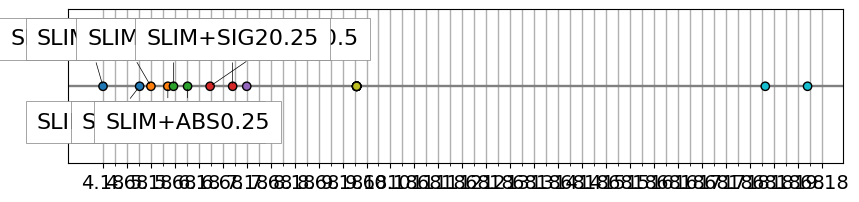

In [ ]:
plot_avg_ranking(get_avg_ranking(results, 'test.f1_score'))

In [ ]:
get_ranking_significance(get_rankings(results.loc[results['dataset_name'] != 'musk'], 'test.f1_score'))

np.float64(0.014894132369050817)

In [ ]:
results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.accuracy'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.681778,0.680444,0.676444,0.672000,0.691556
clima,0.932716,0.601235,0.911111,0.890741,0.900000
eeg,0.553293,0.485826,0.504673,0.516466,0.533890
fertility,0.816667,0.720000,0.810000,0.793333,0.823333
gina,0.774313,0.623784,0.764482,0.761628,0.724736
hill,0.710165,0.524176,0.632967,0.611813,0.617857
ilpd,0.597143,0.520000,0.609143,0.584571,0.592000
kc,0.788468,0.739021,0.772196,0.771564,0.772986
liver,0.603846,0.561538,0.579808,0.575000,0.582692


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
get_aggregated_performance(results, 'test.f1_score').rank(axis=1, ascending=False, method='min')

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,4.0,2.0,3.0,5.0,1.0
clima,1.0,5.0,2.0,3.0,4.0
eeg,1.0,5.0,4.0,3.0,2.0
fertility,5.0,1.0,2.0,3.0,4.0
gina,1.0,5.0,2.0,3.0,4.0
hill,1.0,5.0,2.0,4.0,3.0
ilpd,3.0,5.0,1.0,4.0,2.0
kc,2.0,5.0,1.0,4.0,3.0
liver,3.0,5.0,1.0,4.0,2.0


In [ ]:
get_ranks

NameError: name 'get_ranks' is not defined

In [ ]:
results.groupby(["dataset_name", "config_id"], as_index=False)['test.f1_score'].mean()

,dataset_name,config_id,test.f1_score
0,blood,1,0.489739
1,blood,2,0.495906
2,blood,3,0.485300
3,blood,4,0.497855
4,blood,5,0.502132
5,clima,1,0.597006
6,clima,2,0.546938
7,clima,3,0.460510
8,clima,4,0.238114
9,clima,5,0.452019


In [ ]:
get_rankings(results, 'test.f1_score')

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
results.groupby(['dataset_name', 'config_id', 'run_id'])['test.roc_auc'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_id,1,2,3,4,5
dataset_name,,,,,
blood,0.704646,0.713721,0.713840,0.700130,0.720695
clima,0.930792,0.888127,0.849710,0.699903,0.857819
eeg,0.620378,0.578697,0.590683,0.556187,0.610245
fertility,0.527885,0.601923,0.579808,0.646154,0.553846
gina,0.804494,0.791544,0.780960,0.635900,0.738208
hill,0.733513,0.645610,0.645598,0.536001,0.657209
ilpd,0.701488,0.706544,0.696112,0.677392,0.698128
kc,0.743076,0.763529,0.707730,0.711905,0.732695
liver,0.644545,0.645417,0.646970,0.607500,0.657197


In [ ]:
logs = get_all_logs('experiment4')
logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,GSGP,blood,1,1,0.488119,0.035235,1674.0,0.541657,13,1
1,1,GSGP,blood,1,2,0.487492,0.040060,2110.0,0.538053,19,1
2,1,GSGP,blood,1,3,0.476080,0.034311,2476.0,0.447111,27,1
3,1,GSGP,blood,1,4,0.476010,0.034666,3212.0,0.483274,25,1
4,1,GSGP,blood,1,5,0.473637,0.038076,3612.0,0.513860,33,1
...,...,...,...,...,...,...,...,...,...,...,...
180283,4,SLIM+SIG2,spect,5,496,0.372243,0.011628,6319.0,0.378436,128,1
180284,4,SLIM+SIG2,spect,5,497,0.372243,0.010888,5601.0,0.378436,128,1
180285,4,SLIM+SIG2,spect,5,498,0.372243,0.011301,5199.0,0.378436,128,1
180286,4,SLIM+SIG2,spect,5,499,0.372243,0.010002,5121.0,0.378436,128,1


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.accuracy'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.681778,0.680444,0.676444,0.672000,0.691556
clima,0.932716,0.601235,0.911111,0.890741,0.900000
eeg,0.553293,0.485826,0.504673,0.516466,0.533890
fertility,0.816667,0.720000,0.810000,0.793333,0.823333
gina,0.774313,0.623784,0.764482,0.761628,0.724736
hill,0.710165,0.524176,0.632967,0.611813,0.617857
ilpd,0.597143,0.520000,0.609143,0.584571,0.592000
kc,0.788468,0.739021,0.772196,0.771564,0.772986
liver,0.603846,0.561538,0.579808,0.575000,0.582692


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.roc_auc'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.704646,0.700130,0.713721,0.713840,0.720695
clima,0.930792,0.699903,0.888127,0.849710,0.857819
eeg,0.620378,0.556187,0.578697,0.590683,0.610245
fertility,0.527885,0.646154,0.601923,0.579808,0.553846
gina,0.804494,0.635900,0.791544,0.780960,0.738208
hill,0.733513,0.536001,0.645610,0.645598,0.657209
ilpd,0.701488,0.677392,0.706544,0.696112,0.698128
kc,0.743076,0.711905,0.763529,0.707730,0.732695
liver,0.644545,0.607500,0.645417,0.646970,0.657197


In [ ]:
results.groupby(["dataset_name", "config_settings"])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
ana = Analysis('experiment5')
ranks = ana.get_ranks_by_metric()
ranks['test.accuracy'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
2,4.0,2.0,4.0,3.0,2.0,2.0,1.0,3.0,3.0,NaN
3,5.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,NaN
4,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,3.0,2.0,1.0,4.0,3.0,3.0,2.0,2.0,NaN


In [ ]:
ranks

{'test.accuracy':    dataset_name  config_id  test.accuracy  rank
 0         blood          1       0.681778   2.0
 1         blood          2       0.676444   4.0
 2         blood          3       0.672000   5.0
 3         blood          4       0.680444   3.0
 4         blood          5       0.691556   1.0
 5         clima          1       0.932716   1.0
 6         clima          2       0.911111   2.0
 7         clima          3       0.890741   4.0
 8         clima          4       0.601235   5.0
 9         clima          5       0.900000   3.0
 10          eeg          1       0.553293   1.0
 11          eeg          2       0.504673   4.0
 12          eeg          3       0.516466   3.0
 13          eeg          4       0.485826   5.0
 14          eeg          5       0.533890   2.0
 15    fertility          1       0.816667   2.0
 16    fertility          2       0.810000   3.0
 17    fertility          3       0.793333   4.0
 18    fertility          4       0.720000   5.0
 19

In [ ]:
ranks['test.f1_score']

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
ranks['test.f1_score'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,3.0,2.0,3.0,1.0
2,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN
3,5.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,NaN
4,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,NaN


In [ ]:
ranks['test.roc_auc'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,2.0,2.0,4.0,1.0
2,3.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN
3,2.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,NaN
4,5.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,NaN
5,1.0,3.0,2.0,4.0,4.0,2.0,3.0,3.0,1.0,NaN


In [ ]:
ranks['test.accuracy'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.300000
1,2,2.666667
2,3,3.888889
3,4,4.777778
4,5,2.333333


In [ ]:
ranks['test.f1_score'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.000000
2,3,3.666667
3,4,4.222222
4,5,2.777778


In [ ]:
ranks['test.roc_auc'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.333333
2,3,3.333333
3,4,4.444444
4,5,2.555556


In [ ]:
ranks_strong_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.333333
1,2,2.666667
2,3,4.000000
3,4,5.000000
4,5,2.000000


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.285714
1,2,2.666667
2,3,3.833333
3,4,4.666667
4,5,2.500000


In [ ]:
ranks_strong_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,3.333333
3,4,3.666667
4,5,3.666667


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.166667
2,3,3.833333
3,4,4.500000
4,5,2.333333


In [ ]:
ranks_strong_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,4.000000
3,4,3.333333
4,5,3.333333


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.666667
2,3,3.000000
3,4,5.000000
4,5,2.166667
